# Rec 4 example to confirm iFT

In [1]:
import numpy as np
from numpy import logspace, linspace
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
import scipy.integrate
from scipy import signal

plt.rcParams['figure.figsize'] = [8, 5.0]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.grid'] = True

SMALL_SIZE = 14
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def nicegrid(ax=plt):
    ax.grid(True, which='major', color='#666666', linestyle=':')
    ax.grid(True, which='minor', color='#999999', linestyle=':', alpha=0.2)
    ax.minorticks_on()
    
%matplotlib inline

try: 
    from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
except:
    %pip install sympy
from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, cos, arg, atan2, pi
from sympy.abc import A,B,t,f 
from sympy import re, im 
p = Symbol('p')

tlim = 6
tt = np.linspace(-tlim, tlim, 1000)
flim = 3
ff = np.linspace(-flim, flim, 1000)
ts = Symbol('t')

In [2]:
sincu = lambda t,p: sinc(p*pi*t) # swithc to sinc ftn that evetyone else uses...
nf1 = sincu(t,2)*sincu(t,2)

def my_rect(p):
    return Piecewise((0, t <= -p/2),(1, t <= p/2),(0, True))

def my_tri(p):
    return Piecewise((0, t <= -p),((t+p)/p, t <= 0),((p-t)/p, t <= 1),(0, True))

nf1 = my_tri(1)
lam_nf1 = lambdify(t, nf1, modules=['numpy'])

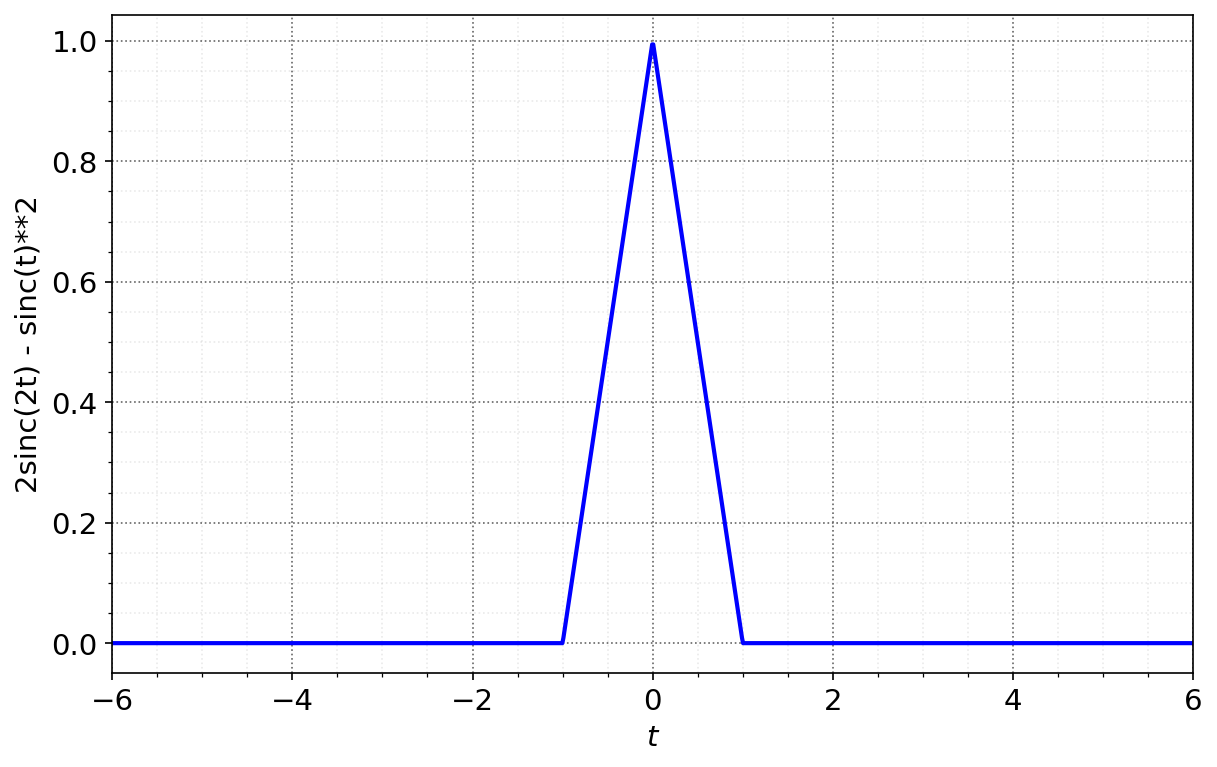

In [3]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_nf1(tt),'b')
plt.xlim(-tlim,tlim)
plt.xlabel('$t$')
plt.ylabel('2sinc(2t) - sinc(t)**2')
nicegrid()
plt.show()

In [4]:
nQ1 = fourier_transform(nf1, t, f)
lam_nQ1 = lambdify(f, nQ1, modules=['numpy'])

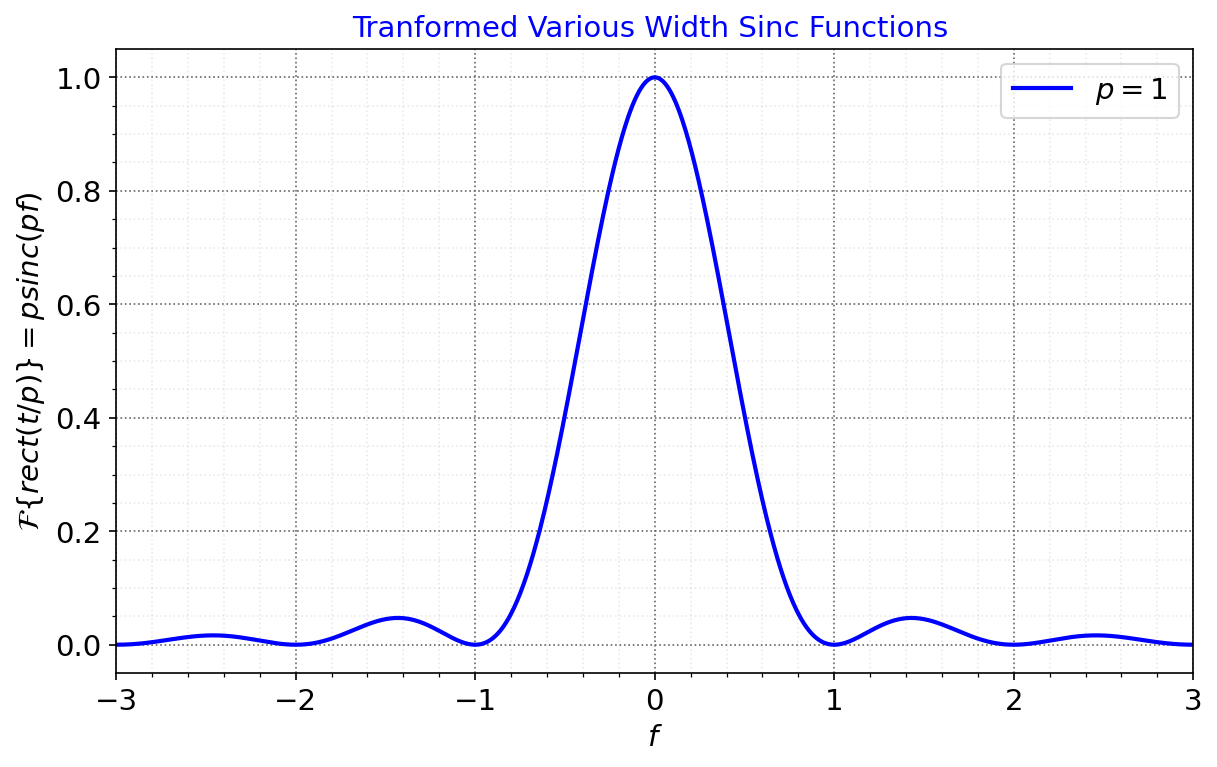

In [9]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(ff, abs(lam_nQ1(ff)),'b',label='$p=1$')

plt.legend()
plt.xlim(-flim,flim)
plt.xlabel('$f$')
plt.ylabel('${\cal F}\{rect(t/p)\} = p sinc (pf)$')
plt.title('Tranformed Various Width Sinc Functions ')
nicegrid()
plt.show()

In [11]:
nQ2 = fourier_transform(nQ1, f, t)
lam_nQ2 = lambdify(t, nQ2, modules=['numpy'])

In [12]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, abs(lam_nQ2(tt)),'b',label='$p=1$')

plt.legend()
plt.xlim(-tlim,tlim)
plt.xlabel('$t$')
#plt.ylabel('${\cal F}\{rect(t/p)\} = p sinc (pf)$')
plt.title('Tranformed Various Width Sinc Functions ')
nicegrid()
plt.show()

NameError: name 'FourierTransform' is not defined

<Figure size 1200x750 with 0 Axes>